In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import sys
sys.path.append('../')

In [3]:
from src.environments import centipede_v0
import supersuit as ss
from pettingzoo.utils.conversions import to_parallel

In [4]:
from stable_baselines3.common.monitor import Monitor


In [215]:
env = centipede_v0.env(prob=True)
#env = rpsls_v1.env()


#env = ss.agent_indicator_v0(env)


Centipede! 100
{'player_0': Discrete(3), 'player_1': Discrete(3)}


In [216]:
from pettingzoo.utils import random_demo
random_demo(env)


Current moves of: player_0 , NONE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

Current moves of: player_0 , COOPERATE
Current moves of: player_1 , COOPERATE
rewards 

45.5

In [224]:
env = centipede_v0.env(prob=False)

env = to_parallel(env)

env = ss.pettingzoo_env_to_vec_env_v0(env)
env = ss.concat_vec_envs_v0(env, 1, base_class='stable_baselines3')



Centipede! 100
{'player_0': Discrete(3), 'player_1': Discrete(3)}


In [225]:
from stable_baselines3.common.callbacks import BaseCallback      
from pprint import pprint      
        
class TensorboardCallback(BaseCallback):
    """
    Custom callback for plotting additional values in tensorboard.
    """

    def __init__(self, verbose=0):
        super(TensorboardCallback, self).__init__(verbose)
        self.value=0

    def _on_step(self) -> bool:
        # Log scalar value (here a random variable)
        #pprint(self.locals)
#         self.value = sum(self.locals["rewards"])
#         self.logger.record('reward', self.value)
        
        if (self.num_timesteps % 10 == 0):
            self.logger.dump(self.num_timesteps)
            self.value = sum(self.locals["rewards"])
            
            if self.value != 0:
                self.logger.record('reward', self.value)
        
        return True
        
reward_logger = TensorboardCallback()


In [226]:
from stable_baselines3 import PPO, A2C, DQN

model = PPO('MlpPolicy', 
            env, 
            verbose=5,
            tensorboard_log='tmp/',
            )
model.learn(total_timesteps=2000000,callback=TensorboardCallback())
model.save("policy")

Using cpu device
Logging to tmp/PPO_41
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 7        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1   

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 5        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 5        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 5        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 7        |
---------------------
----------

---------------------
| reward | 7        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 5        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 5        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 5        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 3        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 5        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------------------
| reward             | 1        |
| time/              |          |
|    fps             | 975      |
|    i

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
game ended peacfully
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
-----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
game ended

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
game ended peacfully
---------------------
| reward | 141      |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
-----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
game ended

---------------------
| reward | 1        |
---------------------
game ended peacfully
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
game ended peacfully
---------------------
| reward | -2       |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------------------
| reward             | 1        |
| time/              |          |
|    fps             | 820      |
|    iterations      | 15       |
|    time_elapsed    | 74       |
|    total_timesteps | 61440    |
---------------------------------
---------------------------------------
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00367  |
|    explained_variance   | 0         |
|    learning_rate        | 0.0003    |
|    loss                 | 0.501     |
|    n_updates            | 150       |
|    policy_gradient_loss | -8.03e-09 |
|    value_loss           | 1         |
---------------------------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------------------
| reward             | 1        |
| time/              |          |
|    fps             | 774      |
|    iterations      | 18       |
|    time_elapsed    | 95       |
|   

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
---------------------
| reward | 1        |
---------------------
----------

KeyboardInterrupt: 

In [227]:
r = []

for i in range(1):

    env = centipede_v0.env()

    #env = ss.agent_indicator_v0(env)
    rewards = []
    env.reset()
    for agent in env.agent_iter():
        obs, reward, done, info = env.last()
        rewards.append(reward)
        obs = obs
        print('obs', obs)
        act = model.predict(obs)[0] if not done else None
        print('action', act)
        env.step(act)
        env.render()
    
    r.append(len(rewards))
rewards

Centipede! 100
{'player_0': Discrete(3), 'player_1': Discrete(3)}
obs 2
action 0
Current moves of: player_0 , DEFECT
Current moves of: player_1 , NONE
rewards {'player_0': 0, 'player_1': 0}

obs 2
action 0
Current moves of: player_0 , DEFECT
Current moves of: player_1 , DEFECT
rewards {'player_0': 1.5, 'player_1': -0.5}

obs 0
action None
Current moves of: player_1 , DEFECT
rewards {'player_1': 0}

obs 0
action None
rewards {}



[0, 0, 1.5, -0.5]

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

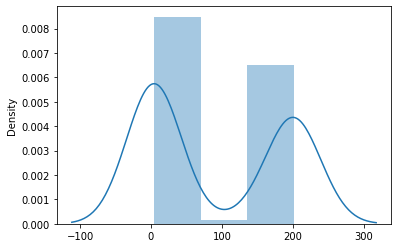

In [80]:
import seaborn as sns

sns.distplot(r)

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

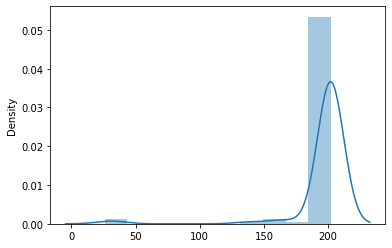

In [57]:
import seaborn as sns

sns.distplot(r)

/home/arjun/anaconda3/envs/rlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

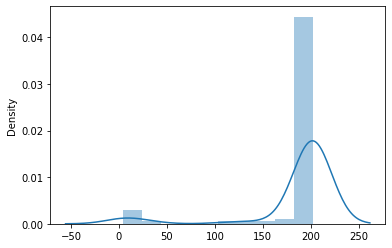

In [62]:

sns.distplot(r)

In [151]:
import sys
sys.path.append('../')

from pettingzoo.test import parallel_api_test
from src.environments import simple_pd_v0

env = dilemma_v0.env()
env = to_parallel(env)

parallel_api_test(env, num_cycles=1)


In [191]:
env = dilemma_v0.env('sd')

#env = ss.agent_indicator_v0(env)
rewards = []
env.reset()

In [227]:

obs, reward, done, info = env.last()
print(obs, reward, done, info)
rewards.append(reward)
act = model.predict(2)[0] if not done else None
env.step(1)
env.render()

1 1 False {}
Current state: Agent1: ANTI_SOCIAL , Agent2: ANTI_SOCIAL
{'player_0': 1, 'player_1': 1}



In [65]:
[0 for n in range(5)]

[0, 0, 0, 0, 0]

In [26]:
np.zeros((2,))

array([0., 0.])

In [72]:
import numpy as np

np.random.choice(2,  p=[0.5, 0.5])

1

In [35]:
np.log(1 - 0.1 - 0.9 - 0.1*0.9)

<ipython-input-35-b1cebb2cf1ce>:1: RuntimeWarning: invalid value encountered in log
  np.log(1 - 0.1 - 0.9 - 0.1*0.9)


nan

In [38]:
np.log(0.5)

-0.6931471805599453

In [40]:
1 - 0.1 - 0.9 + 0.1*0.9

0.09000000000000001

In [99]:
f = np.zeros(100)
np.insert(f, 2, 5)

array([0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [191]:
np.random.choice([0,1], p=[0.5,0.5])

1

In [ ]:
# if self.prob:
        #     print('action2', action)
        #     if action == 0:
        #         action = np.random.choice([0,1], p=[0,1])
        #         if action == 1: print('flipped')

In [ ]:
https://www.researchgate.net/publication/281064730_Competitive_Centipede_Games_Zero-End_Payoffs_and_Payoff_Inequality_Deter_Reciprocal_Cooperation